In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/data_replating.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/data_replating_clean.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/data_replating_onehot_2clases.csv"
CONTINUOUS_2LABEL_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/data_replating_continuous_2labels.csv"
CONTINUOUS_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/TFM/data_replating_continuous.csv"

In [ ]:
dataset = pd.read_csv(INPUT_FILE_NAME)
dataset.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Num_Cells_Strain1', 'Num_Cells_Strain2',
       't_deg', 'k_degA', 'k_degB', 'ratioS1', 'ratioS2', 'posS1', 'posS2',
       'Stability', 'Survivors', 'New_Stability'],
      dtype='object')

In [ ]:
dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 0.1', 'posS1', 'posS2'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Num_Cells_Strain1  9030 non-null   int64  
 1   Num_Cells_Strain2  9030 non-null   int64  
 2   t_deg              9030 non-null   int64  
 3   k_degA             9030 non-null   float64
 4   k_degB             9030 non-null   float64
 5   ratioS1            9030 non-null   float64
 6   ratioS2            9030 non-null   float64
 7   Stability          9030 non-null   float64
 8   Survivors          9030 non-null   float64
 9   New_Stability      9030 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 705.6 KB


In [ ]:
dataset.head(10)

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors,New_Stability
0,8,4,12,0.1,0.3,1.074368,0.584471,0.2,0.9,0.6
1,8,4,12,0.1,0.3,1.074368,0.584471,0.2,0.1,1.0
2,8,4,12,0.1,0.3,1.074368,0.584471,0.2,0.3,1.0
3,8,4,12,0.1,0.3,1.074368,0.584471,0.2,0.5,1.0
4,8,4,12,0.1,0.3,1.074368,0.584471,0.2,0.7,0.5
5,8,4,12,0.3,0.3,1.074368,0.584471,0.7,0.9,0.6
6,8,4,12,0.3,0.3,1.074368,0.584471,0.7,0.1,0.8
7,8,4,12,0.3,0.3,1.074368,0.584471,0.7,0.3,0.8
8,8,4,12,0.3,0.3,1.074368,0.584471,0.7,0.5,0.8
9,8,4,12,0.3,0.3,1.074368,0.584471,0.7,0.7,0.8


In [ ]:
dataset.tail(10)

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors,New_Stability
9020,8,5,36,0.1,0.3,1.159105,0.720724,0.2,0.1,1.0
9021,8,5,36,0.1,0.3,1.159105,0.720724,0.2,0.3,1.0
9022,8,5,36,0.1,0.3,1.159105,0.720724,0.2,0.5,0.9
9023,8,5,36,0.1,0.3,1.159105,0.720724,0.2,0.7,0.7
9024,8,5,36,0.1,0.3,1.159105,0.720724,0.2,0.9,0.4
9025,8,5,46,0.1,0.3,1.159105,0.720724,0.1,0.1,1.0
9026,8,5,46,0.1,0.3,1.159105,0.720724,0.1,0.3,1.0
9027,8,5,46,0.1,0.3,1.159105,0.720724,0.1,0.5,1.0
9028,8,5,46,0.1,0.3,1.159105,0.720724,0.1,0.7,0.8
9029,8,5,46,0.1,0.3,1.159105,0.720724,0.1,0.9,0.3


**First Step:** find out whether or not there are missing values. 

In [ ]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'New_Stability': 0,
 'Num_Cells_Strain1': 0,
 'Num_Cells_Strain2': 0,
 'Stability': 0,
 'Survivors': 0,
 'k_degA': 0,
 'k_degB': 0,
 'ratioS1': 0,
 'ratioS2': 0,
 't_deg': 0}

In [ ]:
dataset = dataset.fillna(3)
dataset['ratioS1'] = dataset['ratioS1'].replace([1000], 3)
dataset['ratioS2'] = dataset['ratioS2'].replace([1000], 3)

In [ ]:
dataset = dataset.drop_duplicates()

**Second Step**: Check outliers and scale data. There are several actions to consider regarding outliers:


1.   **Scale** each attribute based on its mean and standard deviation (normalization). This approach may produce values larger than 1 or lower than -1.
2.   **Remove** rows containing outliers; at least some of them. The disadvantage is that we do not have so many examples in the dataset.
3.   **Curate** data by modifying outliers.

In [ ]:
normalized_ds = pd.DataFrame (scale (dataset.drop (columns="New_Stability"), axis=0, copy=True),columns=dataset.drop (columns="New_Stability").columns) 
normalized_ds

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors
0,1.034227,-0.294811,-1.380622,-1.131165,-0.602826,0.463568,-0.565492,-1.258491,1.366675
1,1.034227,-0.294811,-1.380622,-1.131165,-0.602826,0.463568,-0.565492,-1.258491,-1.436131
2,1.034227,-0.294811,-1.380622,-1.131165,-0.602826,0.463568,-0.565492,-1.258491,-0.735430
3,1.034227,-0.294811,-1.380622,-1.131165,-0.602826,0.463568,-0.565492,-1.258491,-0.034728
4,1.034227,-0.294811,-1.380622,-1.131165,-0.602826,0.463568,-0.565492,-1.258491,0.665973
...,...,...,...,...,...,...,...,...,...
8671,1.034227,0.045772,0.499306,-1.131165,-0.602826,0.649462,-0.253746,-1.258491,0.665973
8672,1.034227,0.045772,0.499306,-1.131165,-0.602826,0.649462,-0.253746,-1.258491,1.366675
8673,1.034227,0.045772,1.282610,-1.131165,-0.602826,0.649462,-0.253746,-1.623530,-0.034728
8674,1.034227,0.045772,1.282610,-1.131165,-0.602826,0.649462,-0.253746,-1.623530,0.665973


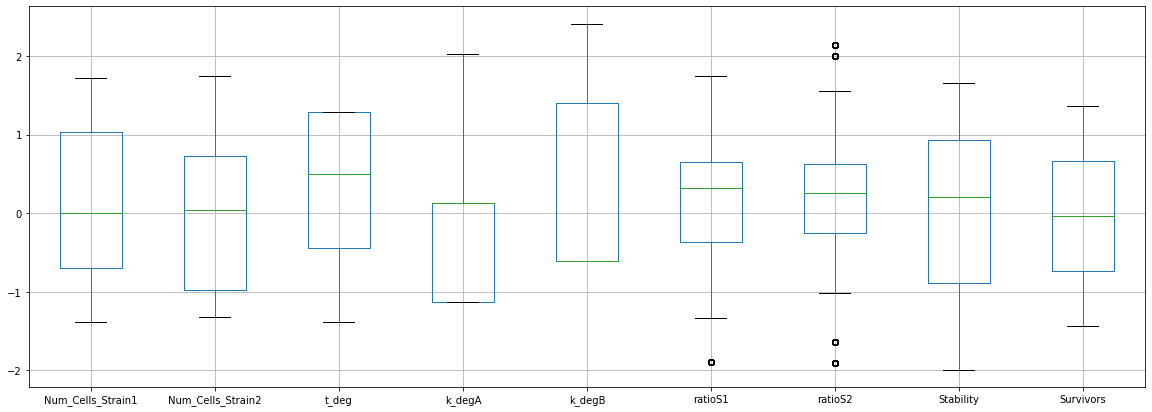

In [ ]:
normalized_ds.boxplot(figsize=(20,7))

In [ ]:
standardized_ds = pd.DataFrame (minmax_scale (dataset.drop (columns="New_Stability"), axis=0, copy=True),columns=dataset.drop (columns="New_Stability").columns) 
standardized_ds

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors
0,0.777778,0.333333,0.000000,0.0,0.0,0.646649,0.330775,0.2,1.00
1,0.777778,0.333333,0.000000,0.0,0.0,0.646649,0.330775,0.2,0.00
2,0.777778,0.333333,0.000000,0.0,0.0,0.646649,0.330775,0.2,0.25
3,0.777778,0.333333,0.000000,0.0,0.0,0.646649,0.330775,0.2,0.50
4,0.777778,0.333333,0.000000,0.0,0.0,0.646649,0.330775,0.2,0.75
...,...,...,...,...,...,...,...,...,...
8671,0.777778,0.444444,0.705882,0.0,0.0,0.697652,0.407885,0.2,0.75
8672,0.777778,0.444444,0.705882,0.0,0.0,0.697652,0.407885,0.2,1.00
8673,0.777778,0.444444,1.000000,0.0,0.0,0.697652,0.407885,0.1,0.50
8674,0.777778,0.444444,1.000000,0.0,0.0,0.697652,0.407885,0.1,0.75


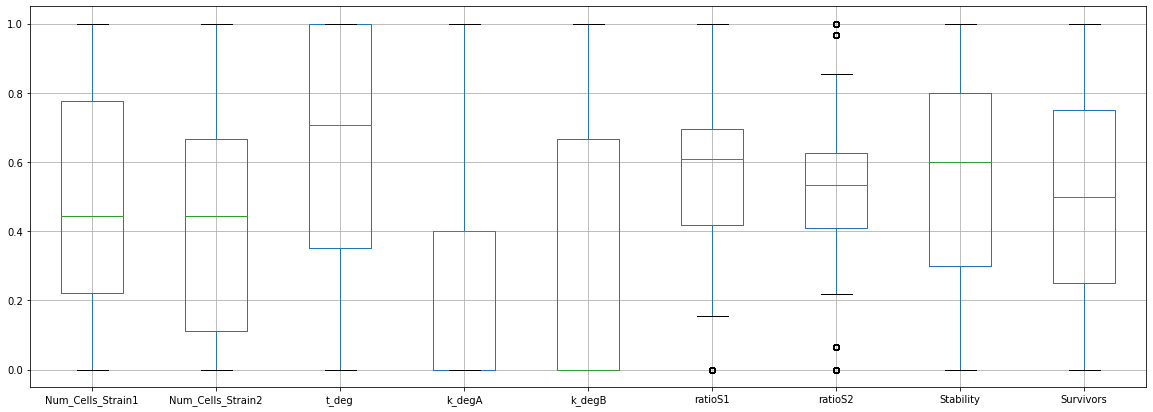

In [ ]:
standardized_ds.boxplot(figsize=(20,7))

Both boxplot figures show the existence of really few outliers. We proceed to curate the data.
**We study each attribute** and apply modifications to outliers to get them into the normal distribution. No lo hago porque no me hace falta.

Let's see the **correlation matrix** and **descriptive statistics** on the dataset. The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [ ]:
dataset.corr()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors,New_Stability
Num_Cells_Strain1,1.000000,-0.271122,-0.005806,-0.052551,-0.118788,0.542305,-0.192366,0.028688,-0.005631,0.082534
Num_Cells_Strain2,-0.271122,1.000000,0.003079,-0.048207,-0.012949,-0.201203,0.495748,0.047086,-0.002674,0.122564
t_deg,-0.005806,0.003079,1.000000,0.027731,-0.018694,-0.003433,-0.001405,0.063072,0.001360,0.044016
k_degA,-0.052551,-0.048207,0.027731,1.000000,0.440470,-0.084122,-0.076929,0.312319,-0.004600,0.154757
k_degB,-0.118788,-0.012949,-0.018694,0.440470,1.000000,-0.126178,-0.068900,0.098700,-0.001300,0.200545
ratioS1,0.542305,-0.201203,-0.003433,-0.084122,-0.126178,1.000000,-0.235115,0.027823,-0.006047,0.108921
ratioS2,-0.192366,0.495748,-0.001405,-0.076929,-0.068900,-0.235115,1.000000,0.095733,-0.001665,0.169656
Stability,0.028688,0.047086,0.063072,0.312319,0.098700,0.027823,0.095733,1.000000,-0.007502,0.522295
Survivors,-0.005631,-0.002674,0.001360,-0.004600,-0.001300,-0.006047,-0.001665,-0.007502,1.000000,-0.192073
New_Stability,0.082534,0.122564,0.044016,0.154757,0.200545,0.108921,0.169656,0.522295,-0.192073,1.000000


In [ ]:
dataset.describe()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors,New_Stability
count,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000
mean,5.002536,4.865606,29.625634,0.279115,0.360005,0.863056,0.831627,0.544756,0.509912,0.662794
std,2.898433,2.936313,12.767177,0.158355,0.099545,0.455863,0.437088,0.273959,0.285445,0.299107
min,1.000000,1.000000,12.000000,0.100000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,3.000000,2.000000,24.000000,0.100000,0.300000,0.695246,0.720724,0.300000,0.300000,0.400000
50%,5.000000,5.000000,36.000000,0.300000,0.300000,1.009548,0.944120,0.600000,0.500000,0.700000
75%,8.000000,7.000000,46.000000,0.300000,0.500000,1.157472,1.104084,0.800000,0.700000,1.000000
max,10.000000,10.000000,46.000000,0.600000,0.600000,1.661438,1.766977,1.000000,0.900000,1.000000


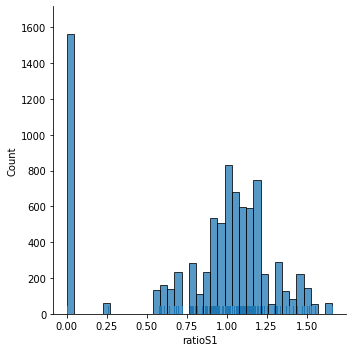

In [ ]:
sns.displot(dataset["ratioS1"], kde=False, rug=True)

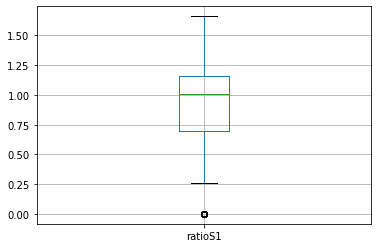

In [ ]:
dataset.boxplot(column=['ratioS1'])

In [ ]:
print("minimum: ",np.amin(dataset['ratioS1'].values), "Maximum: ", np.amax(dataset['ratioS1'].values))

minimum:  0.0 Maximum:  1.6614384627739052


In [ ]:
#dataset.loc[dataset['ratioS1'] < 0.25,'ratioS1']= 0.25
#dataset.boxplot(column=['ratioS1'])

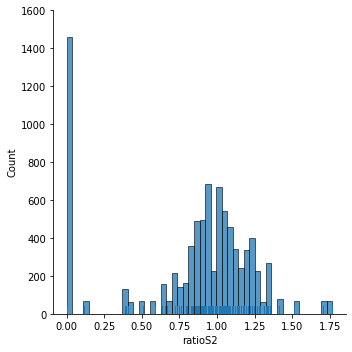

In [ ]:
sns.displot(dataset["ratioS2"], kde=False, rug=True)

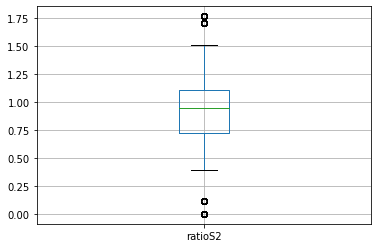

In [ ]:
dataset.boxplot(column=['ratioS2'])

In [ ]:
print("minimum: ",np.amin(dataset['ratioS2'].values), "Maximum: ", np.amax(dataset['ratioS2'].values))

minimum:  0.0 Maximum:  1.7669774034133563


Check how many instances per label there are and group them if necessary.

In [ ]:
dataset["New_Stability"].value_counts()

1.0    2322
0.6     889
0.5     847
0.9     842
0.7     790
0.8     752
0.4     722
0.3     544
0.2     403
0.0     300
0.1     265
Name: New_Stability, dtype: int64

In [ ]:
dataset.shape

(8676, 10)

In [ ]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors,New_Stability
0,5,10,24,0.1,0.3,0.996185,0.722181,0.7,0.7,0.7
1,5,7,36,0.3,0.3,1.173652,0.731933,0.5,0.1,0.7
2,9,1,36,0.3,0.3,1.232240,0.000000,0.0,0.3,0.3
3,8,2,24,0.1,0.3,1.002342,1.262969,0.3,0.3,1.0
4,4,6,24,0.1,0.3,1.074125,0.943678,0.7,0.9,0.6


In [ ]:
t = dataset['New_Stability']
t[:10]

#Guardamos t en el archivo continuous
t.to_csv(CONTINUOUS_FILE_NAME, index = False)

In [ ]:
# 6 LABELS #
#dataset.loc[dataset['Stability'] == 0.1 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.2 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.4 ,'Stability']=0.3
#dataset.loc[dataset['Stability'] == 0.6 ,'Stability']=0.7
#dataset.loc[dataset['Stability'] == 0.8 ,'Stability']=0.9
#dataset['Stability'].value_counts()

# 4 LABELS #
#dataset.loc[dataset['Stability'] == 0.1 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.2 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.3 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.4 ,'Stability']=0.5
#dataset.loc[dataset['Stability'] == 0.6 ,'Stability']=0.5
#dataset.loc[dataset['Stability'] == 0.8 ,'Stability']=0.7
#dataset.loc[dataset['Stability'] == 0.9 ,'Stability']=1
#dataset['Stability'].value_counts()

# 2 CLASSES #
dataset.loc[dataset['New_Stability'] < 1.0 ,'New_Stability'] =0
dataset['New_Stability'].value_counts()

0.0    6354
1.0    2322
Name: New_Stability, dtype: int64

In [ ]:
#Stability 4 clases
#dataset.loc[dataset['Stability'] == 0.1 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.2 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.3 ,'Stability']=0
#dataset.loc[dataset['Stability'] == 0.4 ,'Stability']=0.5
#dataset.loc[dataset['Stability'] == 0.6 ,'Stability']=0.5
#dataset.loc[dataset['Stability'] == 0.8 ,'Stability']=0.7
#dataset.loc[dataset['Stability'] == 0.9 ,'Stability']=1

In [ ]:
dataset.shape

(8676, 10)

In [ ]:
t = dataset.New_Stability
x = dataset.drop(columns='New_Stability')

x.head()

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors
0,5,10,24,0.1,0.3,0.996185,0.722181,0.7,0.7
1,5,7,36,0.3,0.3,1.173652,0.731933,0.5,0.1
2,9,1,36,0.3,0.3,1.232240,0.000000,0.0,0.3
3,8,2,24,0.1,0.3,1.002342,1.262969,0.3,0.3
4,4,6,24,0.1,0.3,1.074125,0.943678,0.7,0.9


In [ ]:
#Guardamos el continuous file 0 y 1
t.to_csv(CONTINUOUS_2LABEL_FILE_NAME, index = False)

One-hot encode the classes for a classification problem.

In [ ]:
names = np.array(['Unstable', 'Stable'])
names

array(['Unstable', 'Stable'], dtype='<U8')

In [ ]:
encoder = OneHotEncoder(categories="auto", sparse=False) # Function that one-hot encodes integers
one_hot_t = encoder.fit_transform (t.values.reshape(-1,1))
one_hot_t[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=names)
one_hot_t[:10]

,Unstable,Stable
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


Min-max scale of the input dataset (attributes) within the range [-1,1] for each feature independently.

In [ ]:
print("ratioS1: Minimum: ",np.amin(dataset['ratioS1'].values), "Maximum: ", np.amax(dataset['ratioS1'].values))
print("ratioS2: Minimum: ",np.amin(dataset['ratioS2'].values), "Maximum: ", np.amax(dataset['ratioS2'].values))
print("Num_Cells_Strain1: Minimum: ",np.amin(dataset['Num_Cells_Strain1'].values), "Maximum: ", np.amax(dataset['Num_Cells_Strain1'].values))
print("Num_Cells_Strain2: Minimum: ",np.amin(dataset['Num_Cells_Strain2'].values), "Maximum: ", np.amax(dataset['Num_Cells_Strain2'].values))
print("t_deg: Minimum: ",np.amin(dataset['t_deg'].values), "Maximum: ", np.amax(dataset['t_deg'].values))
print("k_degA: Minimum: ",np.amin(dataset['k_degA'].values), "Maximum: ", np.amax(dataset['k_degA'].values))
print("k_degB: Minimum: ",np.amin(dataset['k_degB'].values), "Maximum: ", np.amax(dataset['k_degB'].values))

ratioS1: Minimum:  0.0 Maximum:  1.6614384627739052
ratioS2: Minimum:  0.0 Maximum:  1.7669774034133563
Num_Cells_Strain1: Minimum:  1 Maximum:  10
Num_Cells_Strain2: Minimum:  1 Maximum:  10
t_deg: Minimum:  12 Maximum:  46
k_degA: Minimum:  0.1 Maximum:  0.6
k_degB: Minimum:  0.3 Maximum:  0.6


In [ ]:
x_s = pd.DataFrame (minmax_scale (x, feature_range=(-1, 1),axis=0, copy=True),columns=x.columns) 
x_s[:10]

,Num_Cells_Strain1,Num_Cells_Strain2,t_deg,k_degA,k_degB,ratioS1,ratioS2,Stability,Survivors
0,-0.333333,-0.333333,1.000000,-0.2,-1.000000,0.344356,0.073814,0.6,0.5
1,0.333333,0.333333,-1.000000,-1.0,-1.000000,-0.063478,0.336672,0.4,-1.0
2,0.777778,-0.111111,-0.294118,-0.2,-1.000000,0.261183,0.126745,0.0,0.5
3,0.111111,-1.000000,-1.000000,-1.0,-1.000000,0.215270,-1.000000,-0.6,0.5
4,-0.111111,-0.777778,0.411765,-0.2,-1.000000,0.452209,0.454191,-0.4,0.0
5,-0.777778,0.333333,0.411765,-0.2,0.333333,-0.230960,0.397655,-0.6,1.0
6,0.555556,-1.000000,-0.294118,-0.2,0.333333,-0.163080,-1.000000,0.8,1.0
7,0.555556,-0.111111,1.000000,-1.0,-1.000000,0.246572,0.064818,0.4,0.0
8,0.555556,-0.555556,-0.294118,-0.2,0.333333,0.381748,0.203914,-0.4,1.0
9,1.000000,-0.555556,-0.294118,-0.2,-1.000000,0.455938,0.231981,-0.4,0.5


In [ ]:
x_s.to_csv(ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)